# Homework 7: Testing Hypotheses

**Reading**: 
* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/testing-hypotheses.html)

Please complete this notebook by filling in the cells provided.


HOWEVER, the autograder files have not been integrated online and running the cell above will cause an error! Ignore this cell and cells of the form grader.check("qx.k").

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
import scipy.stats


#import otter
#grader = otter.Notebook()


## 1. Spam Calls


## Part 1: 781 Fun

Yanay gets a lot of spam calls. An area code is defined to be a three digit number from 200-999 inclusive. In reality, many of these area codes are not in use, but for this question we'll simplify things and assume they all are. **Throughout these questions, you should assume that Yanay's area code is 781.**

**Question 1.** Assuming each area code is just as likely as any other, what's the probability that the area code of two back to back spam calls are 781?


<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [3]:
prob_781 = ...
prob_781

Ellipsis

**Question 2.** Rohan already knows that Yanay's area code is 781. Rohan randomly guesses the last 7 digits (0-9 inclusive) of his phone number. What's the probability that Rohan correctly guesses Yanay's number, assuming he’s equally likely to choose any digit?

*Note: A phone number contains an area code and 7 additional digits, i.e. xxx-xxx-xxxx*

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [4]:
prob_yanay_num = 1/10**7
prob_yanay_num

1e-07

Yanay suspects that there's a higher chance that the spammers are using his area code (781) to trick him into thinking it's someone from his area calling him. Ashley thinks that this is not the case, and that spammers are just choosing area codes of the spam calls at random from all possible area codes (*Remember, for this question we’re assuming the possible area codes are 200-999, inclusive*). Yanay wants to test his claim using the 50 spam calls he received in the past month.

Here's a dataset of the area codes of the 50 spam calls he received in the past month.

In [5]:
# Just run this cell
spam = Table().read_table('spam.csv')
spam

Area Code
891
924
516
512
328
613
214
781
591
950


**Question 3.** Define the null hypothesis and alternative hypothesis for this investigation. 

*Hint: Don’t forget that your null hypothesis should fully describe a probability model that we can use for simulation later.*


<!--
BEGIN QUESTION
name: q1_3
manual: true
-->
<!-- EXPORT TO PDF -->

$H_o: \pi = \frac{1}{800}$

H0: pi = 1/800



$H_a: \pi > \frac{1}{800}$

Ha: pi > 1/800

### Binomial Test

Below is the code to run a binomial test, along with the results.

In [6]:
num_781 = spam.where("Area Code", 781).num_rows

total_calls = spam.num_rows

pval = scipy.stats.binom_test(num_781, total_calls, 1/800, alternative = "greater")

print(f"Binomial Test Results: The p-value = {pval}")

Binomial Test Results: The p-value = 0.0018391612040641796


**Question 4.** Suppose you use a p-value cutoff of 5%. What do you conclude from the hypothesis test? Why?

*Write your answer here, replacing this text.*

Suppose now that we want to re-run this hypothesis test using the simulation approach.  


**Question 5.** Which of the following test statistics would be a reasonable choice to help differentiate between the two hypotheses?

*Hint*: For a refresher on choosing test statistics, check out the textbook section on [Test Statistics](https://www.inferentialthinking.com/chapters/11/3/decisions-and-uncertainty.html#Step-2:-The-Test-Statistic).

1. The proportion of area codes that are 781 in 50 random spam calls
2. The probability of getting an area code of 781 out of all the possible area codes.
3. The proportion of area codes that are 781 in 50 random spam calls divided by 2
4. The number of times you see the area code 781 in 50 random spam calls

Assign `reasonable_test_statistics` to an array of numbers corresponding to these test statistics.

<!--
BEGIN QUESTION
name: q1_4
manual: false
-->

In [7]:
reasonable_test_statistics = make_array(1,4)

<div class="hide">\pagebreak</div>

**For the rest of this question, suppose you decide to use the number of times you see the area code 781 in 50 spam calls as your test statistic.**

**Question 6.** 
Write a function called `simulate` that generates exactly one simulated value of your test statistic under the null hypothesis.  It should take no arguments and simulate 50 area codes under the assumption that the result of each area is sampled from the range 200-999 inclusive with equal probability. Your function should return the number of times you saw the 781 area code in those 50 random spam calls.


<!--
BEGIN QUESTION
name: q1_5
manual: false
-->

In [8]:
possible_area_codes = np.arange(200,1000)


def simulate():
    sample = np.random.choice(possible_area_codes, 50, replace=True)
    return sum(sample == 781)
    #return Table().with_column("Sample", sample).where("Sample", 781).num_rows
# Call your function to make sure it works
simulate()

0

**Question 7.** Generate 20,000 simulated values of the number of times you see the area code 781 in 50 random spam calls. Assign `test_statistics_under_null` to an array that stores the result of each of these trials. 

*Hint*: Use the function you defined in Question 6.

<!--
BEGIN QUESTION
name: q1_6
manual: false
-->

In [9]:
test_statistics_under_null = make_array()
repetitions = 20000

for i in np.arange(repetitions):
    test_statistics_under_null = np.append(test_statistics_under_null, 
                                           simulate())
    
test_statistics_under_null

array([0., 0., 0., ..., 0., 0., 1.])

**Question 8.** Using the results from Question 7, generate a histogram of the empirical distribution of the number of times you saw the area code 781 in your simulation. **NOTE: Use the provided bins when making the histogram**

<!--
BEGIN QUESTION
name: q1_7
manual: true
-->
<!-- EXPORT TO PDF -->

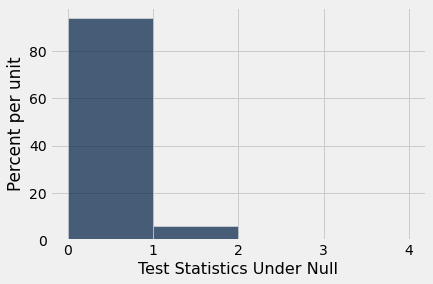

In [10]:
bins = np.arange(0,5,1) # Use these provided bins
Table().with_column("Test Statistics Under Null", 
                    test_statistics_under_null).hist(bins=bins)

<div class="hide">\pagebreak</div>

**Question 9.** Compute an empirical p-value for this test.


<!--
BEGIN QUESTION
name: q1_8
manual: false
-->

In [11]:
# First calculate the observed value of the test statistic from the `spam` table.
observed_val = spam.where("Area Code", 781).num_rows
print(observed_val)
p_value = sum(test_statistics_under_null>=observed_val)/20000
p_value

2


0.00175

**Question 10.** Suppose you use a P-value cutoff of 1%. What do you conclude from the hypothesis test? Why?

<!--
BEGIN QUESTION
name: q1_9
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

## Part 2: Comparing two categorical variables 

Yanay collects information about this month's spam calls. The table `with_labels` is a sampled table, where the `Area Code Visited` column contains either `"Yes"` or `"No"` which represents whether or not Yanay has visited the location of the area code. The `Picked Up` column is `1` if Yanay picked up and `0` if he did not pick up.

In [12]:
# Just run this cell
with_labels = Table().read_table("spam_picked_up.csv")
with_labels.pivot("Picked Up", "Area Code Visited")

/opt/conda/lib/python3.8/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


Area Code Visited,0,1
No,17,18
Yes,4,11


Yanay is going to perform a test to see whether or not he is more likely to pick up a call from an area code he has visited. Specifically, his null hypothesis is that there is no difference in the distribution of calls he picked up between visited and not visited area codes, with any difference due to chance. His alternative hypothesis is that there is a difference between the two categories, specifically that he thinks that he is more likely to pick up if he has visited the area code. We are going to perform a $\chi^2$ test for independence.  

In [13]:
# Chi-squared test for independence
import numpy as np
obs = np.array([[17,18],[4,11]])  # Put data into array structure

import scipy.stats
Results = scipy.stats.chi2_contingency(obs)

## Don't change anything below this line
print(obs)
print("Chi-Square = ", Results[0])
print("p-value = ", Results[1])
print("degrees of freedom = ", Results[2])
print("Expected Table = ")
print(Results[3])

print("Reminder: No zero cells, and not more than 20% with counts below 5 in Expected Table.")

[[17 18]
 [ 4 11]]
Chi-Square =  1.2667135819845186
p-value =  0.2603841162416897
degrees of freedom =  1
Expected Table = 
[[14.7 20.3]
 [ 6.3  8.7]]
Reminder: No zero cells, and not more than 20% with counts below 5 in Expected Table.


**Question 11** Using a level of significance of 0.05, compare the p-value from the above and interpret the results in context.  Is he more likely to pick up the phone if it comes from an area code he has visited?

*Write your answer here, replacing this text.*

## Part 3: Are elephants afraid of bees? 

[Researcher's](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0155690) have been studying whether elephants are afraid of bees.  If they are, this knowledge could be applied to keep elephants from damaging crops or from wandering into areas where the elephants could get hurt, using a so-called [beehive fence](https://elephantsandbees.com/beehive-fence/). 

[Click here for a related video](https://www.youtube.com/embed/6mA1Yl7LEZ4)

Using a [dataset](https://datadryad.org/stash/dataset/doi:10.5061/dryad.rj592) provided via the internet by some researchers in Gabon, this table was created, showing whether an elephant visited a site containing fruit trees Never (0 times), Sometimes (1-5 times) or Often (6-11 times) and whether a beehive was present during the visit.  


|             | Never | Sometimes | Often |
|-:           | -:    |  :-:      |   :-  |
|Hives Absent |50     |16         |4      |
|Hives Present|755    |77         |8      |

We want to run a $\chi^2$ test for independence to see if there's a relationship here that might imply that elephants are deterred by the presence of beehives.  


**Question 12.**  What are the null and alternative hypotheses in this situation?





 

*Write your answer here, replacing this text.*

Null is that there is no relationship, elephants are just as likely to visit sites with bees as to not.

Alternative is that there is some relationship, elephants avoid bees.

**Question 13.** Copy and adapt the code used to run the $\chi^2$ test above so as to run the test to determine if this data supports the claim that elephants are deterred by bees. 

In [14]:
# Chi-squared test for independence
import numpy as np
obs = ...  # Put data into array structure

import scipy.stats
Results = scipy.stats.chi2_contingency(obs)

## Don't change anything below this line
print(obs)
print("Chi-Square = ", Results[0])
print("p-value = ", Results[1])
print("degrees of freedom = ", Results[2])
print("Expected Table = ")
print(Results[3])

print("Reminder: No zero cells, and not more than 20% with counts below 5 in Expected Table.")

TypeError: '<' not supported between instances of 'ellipsis' and 'int'

**Question 14.** Using a p-value cut-off of 0.05, what conclusion do you draw from this data?

*Write your answer here, replacing this text.*

## Congratulations!

You finished.  Download it as HTML and submit it to the assignment folder in D2L.  